In [1]:
from binance.client import Client
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 


In [ ]:
def donwload_data(start_time, end_time, crypto, time):

    data_time = {'minutes':Client.KLINE_INTERVAL_1MINUTE,'seconds':Client.KLINE_INTERVAL_1SECOND,'hours':Client.KLINE_INTERVAL_1HOUR,}
    if time not in data_time:
        raise ValueError(f'El parámetro {time} no está en las opciones {data_time}')
    api_key  = ""
    api_secret = ""
    client = Client(api_key, api_secret)
    start_time_ms = int(pd.Timestamp(start_time).timestamp()*1000)
    end_time_ms = int(pd.Timestamp(end_time).timestamp()*1000)

    all_candles = []
    current_start_time = start_time_ms

    while current_start_time < end_time_ms:
        candles = client.get_klines(symbol=crypto, interval = data_time[time], startTime=current_start_time, endTime=end_time_ms, limit = 1000)
        if not candles:
            break

        all_candles.extend(candles)
        current_start_time = candles[-1][6] + 1 

    columns = [ 'open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']
    
    df = pd.DataFrame(all_candles, columns=columns)    
    df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')    
    df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')

    df['close'] = df['close'].astype(float)
    df['open'] = df['open'].astype(float)

    return df

13:50:59 - cmdstanpy - INFO - Chain [1] start processing
13:53:51 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\santi\Anaconda3\envs\gpu_2_copy\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  dates = pd.date_range(


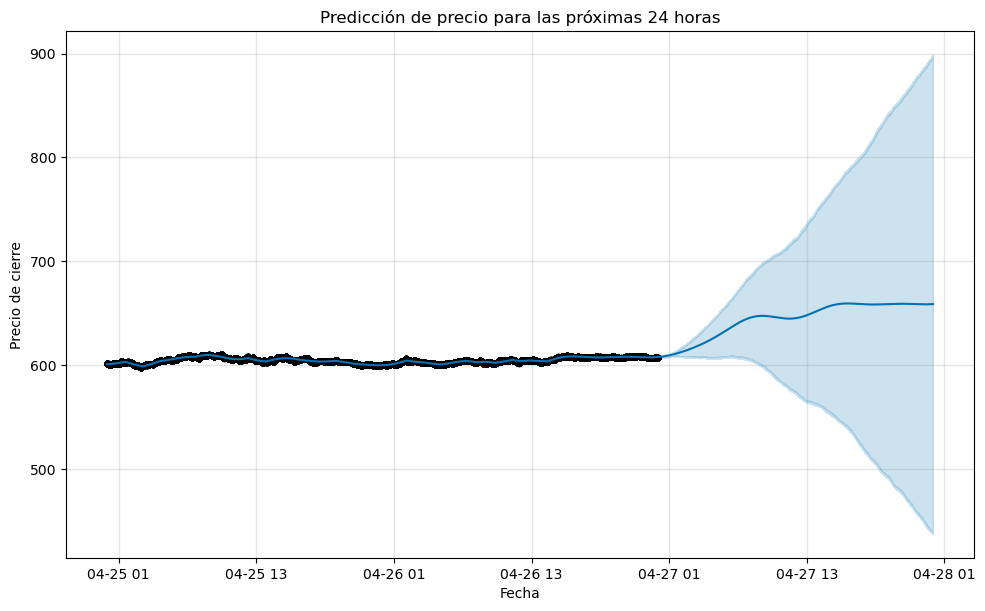

                            ds        yhat  yhat_lower  yhat_upper
259196 2025-04-27 23:59:56.999  658.713370  437.893014  897.673166
259197 2025-04-27 23:59:57.999  658.713612  438.821687  897.249728
259198 2025-04-27 23:59:58.999  658.713854  438.463841  897.920725
259199 2025-04-27 23:59:59.999  658.714096  438.752271  896.798737
259200 2025-04-28 00:00:00.999  658.714339  438.693959  898.451421


In [29]:
# Instalar Prophet si no lo tienes
# !pip install prophet

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

data = donwload_data(start_time='2025-04-25', end_time='2025-04-27', crypto="BNBUSDT", time='seconds')

df = data[['close_time', 'close']].rename(columns={'close_time': 'ds', 'close': 'y'})

model = Prophet(daily_seasonality=True)
model.fit(df)

future = model.make_future_dataframe(periods=24*60*60, freq='S')  
# future = model.make_future_dataframe(periods=24*60*60, freq='min') 

forecast = model.predict(future)

fig1 = model.plot(forecast)
plt.title('Predicción de precio para las próximas 24 horas')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.show()

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


In [26]:
forecast[forecast['ds'] == pd.Timestamp('2025-04-27 23:59:59.999')]


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
518399,2025-04-27 23:59:59.999,618.659244,555.317753,680.778193,554.283168,679.589014,0.815354,0.815354,0.815354,0.815354,0.815354,0.815354,0.0,0.0,0.0,619.474598


In [24]:
forecast[forecast['ds'] == pd.Timestamp('2025-04-27 00:00:00')]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat


In [16]:
start_time = '2025-04-01 00:00:00'
end_time = '2025-04-05 00:00:00'
crypto="BTCUSDT"
time='minutes'

data = donwload_data(start_time = '2025-04-22', end_time = '2025-04-27', crypto="BNBUSDT", time='seconds')


Centrar la atención en open_time, close, volume, taker_buy_base_asset_volume

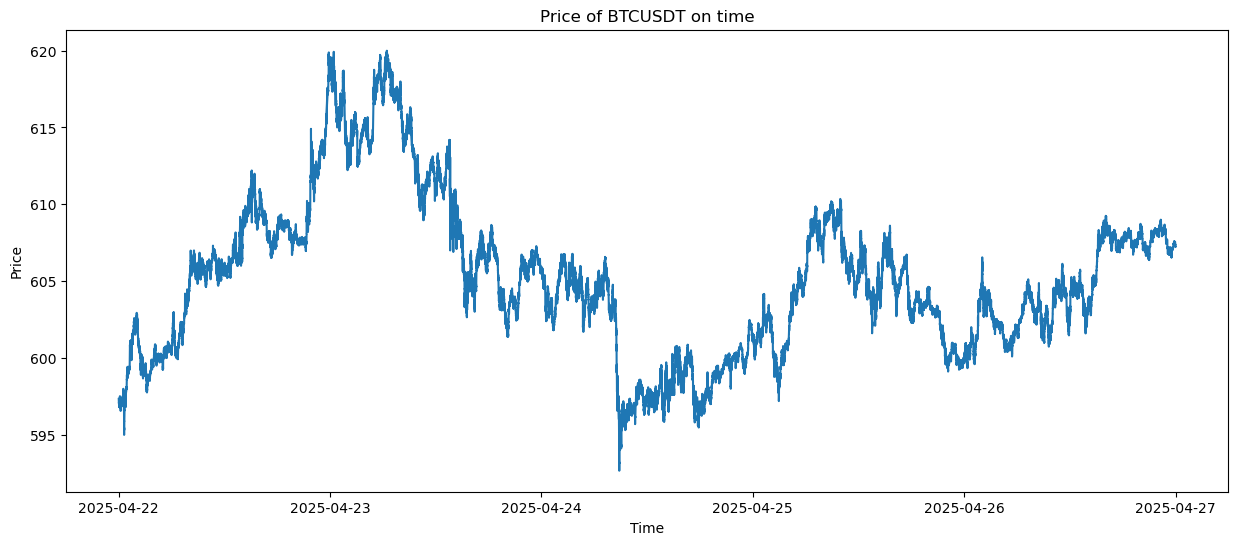

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
data = data[['open_time', 'close', 'volume', 'taker_buy_base_asset_volume']]

plt.figure(figsize=(15,6))
plt.plot( data['open_time'], data['close'])
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'Price of {crypto} on time')

plt.show()